<a href="https://colab.research.google.com/github/whoNann/TUBES_AKA_/blob/main/AKA_Program_Perbandingan_Metode_Latihan_Lari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prettytable

**Program Perbandingan Metode Latihan Lari**

In [ ]:
# Import libraries
import time
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# Fungsi untuk konversi waktu
def seconds_to_minutes(seconds):
    """Mengkonversi detik ke format menit:detik"""
    minutes = int(seconds // 60)
    remaining_seconds = int(seconds % 60)
    return f"{minutes}:{remaining_seconds:02d}"

# Metode Rekursif: Latihan Intensif
def training_recursive(waktu_awal, target, minggu_ke=0):
    """Metode latihan intensif dengan pendekatan rekursif"""
    if waktu_awal <= target:
        return minggu_ke
    # Asumsi peningkatan 30 detik per minggu
    return training_recursive(waktu_awal - 30, target, minggu_ke + 1)

# Metode Iteratif: Latihan Bertahap
def training_iterative(waktu_awal, target):
    """Metode latihan bertahap dengan pendekatan iteratif"""
    waktu_sekarang = waktu_awal
    minggu = 0
    while waktu_sekarang > target:
        # Peningkatan waktu bervariasi
        peningkatan = min(20, waktu_sekarang - target)
        waktu_sekarang -= peningkatan
        minggu += 1
    return minggu

# Inisialisasi list global untuk menyimpan data
waktu_awal_values = []    # Variasi waktu awal
recursive_times = []      # Waktu eksekusi metode rekursif
iterative_times = []      # Waktu eksekusi metode iteratif
recursive_results = []    # Hasil minggu latihan intensif
iterative_results = []    # Hasil minggu latihan bertahap
target_values = []        # Waktu target

# Fungsi untuk memperbarui grafik
def update_graph():
    """Membuat grafik perbandingan waktu dan hasil"""
    plt.figure(figsize=(15, 6))

    # Grafik Waktu Eksekusi
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(waktu_awal_values) + 1), recursive_times,
             label='Latihan Intensif', marker='o', linewidth=2)
    plt.plot(range(1, len(waktu_awal_values) + 1), iterative_times,
             label='Latihan Bertahap', marker='s', linewidth=2)
    plt.title('Perbandingan Waktu Eksekusi', pad=20)
    plt.xlabel('Percobaan ke-')
    plt.ylabel('Waktu Eksekusi (detik)')
    plt.legend()
    plt.grid(True)

    # Grafik Hasil Latihan
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(waktu_awal_values) + 1), recursive_results,
             label='Latihan Intensif', marker='o', linewidth=2)
    plt.plot(range(1, len(waktu_awal_values) + 1), iterative_results,
             label='Latihan Bertahap', marker='s', linewidth=2)
    plt.title('Perbandingan Lama Latihan', pad=20)
    plt.xlabel('Percobaan ke-')
    plt.ylabel('Minggu yang Dibutuhkan')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Fungsi untuk mencetak tabel
def print_execution_table():
    """Mencetak tabel perbandingan eksekusi"""
    table = PrettyTable()
    table.field_names = [
        "No.",
        "Waktu Awal",
        "Waktu Target",
        "Latihan Intensif",
        "Latihan Bertahap",
        "Waktu Rekursif (s)",
        "Waktu Iteratif (s)"
    ]

    for i in range(len(waktu_awal_values)):
        table.add_row([
            i + 1,
            seconds_to_minutes(waktu_awal_values[i]),
            seconds_to_minutes(target_values[i]),
            f"{recursive_results[i]} minggu",
            f"{iterative_results[i]} minggu",
            f"{recursive_times[i]:.6f}",
            f"{iterative_times[i]:.6f}"
        ])

    print(table)

# Fungsi untuk memproses input tunggal
def process_single_input(waktu_awal_str, target_str):
    """Memproses satu set input waktu awal dan target"""
    try:
        # Konversi input string ke detik
        if ":" in waktu_awal_str:
            minutes, seconds = map(int, waktu_awal_str.split(":"))
            waktu_awal = minutes * 60 + seconds
        else:
            waktu_awal = float(waktu_awal_str)

        if ":" in target_str:
            minutes, seconds = map(int, target_str.split(":"))
            target = minutes * 60 + seconds
        else:
            target = float(target_str)

        if waktu_awal <= target:
            print("Error: Waktu target harus lebih rendah dari waktu awal!")
            return False

        # Simpan waktu awal dan target
        waktu_awal_values.append(waktu_awal)
        target_values.append(target)

        # Ukur waktu metode rekursif
        start_time = time.time()
        result_recursive = training_recursive(waktu_awal, target)
        recursive_time = time.time() - start_time

        recursive_times.append(recursive_time)
        recursive_results.append(result_recursive)

        # Ukur waktu metode iteratif
        start_time = time.time()
        result_iterative = training_iterative(waktu_awal, target)
        iterative_time = time.time() - start_time

        iterative_times.append(iterative_time)
        iterative_results.append(result_iterative)

        # Tampilkan hasil
        print(f"\nData ke-{len(waktu_awal_values)}:")
        print(f"Waktu Awal: {seconds_to_minutes(waktu_awal)}")
        print(f"Waktu Target: {seconds_to_minutes(target)}")
        print(f"Hasil Latihan Intensif: {result_recursive} minggu")
        print(f"Hasil Latihan Bertahap: {result_iterative} minggu")

        # Cetak tabel dan grafik
        print("\nTabel Perbandingan:")
        print_execution_table()
        update_graph()

        return True

    except ValueError as e:
        print(f"Error: Format waktu tidak valid!")
        print("Gunakan format menit:detik (contoh: 25:30) atau detik")
        return False


Data ke-1:
Waktu Awal: 60:00
Waktu Target: 40:00
Hasil Latihan Intensif: 40 minggu
Hasil Latihan Bertahap: 60 minggu

Tabel Perbandingan:
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
| No. | Waktu Awal | Waktu Target | Latihan Intensif | Latihan Bertahap | Waktu Rekursif (s) | Waktu Iteratif (s) |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
|  1  |   60:00    |    40:00     |    40 minggu     |    60 minggu     |      0.000025      |      0.000033      |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+


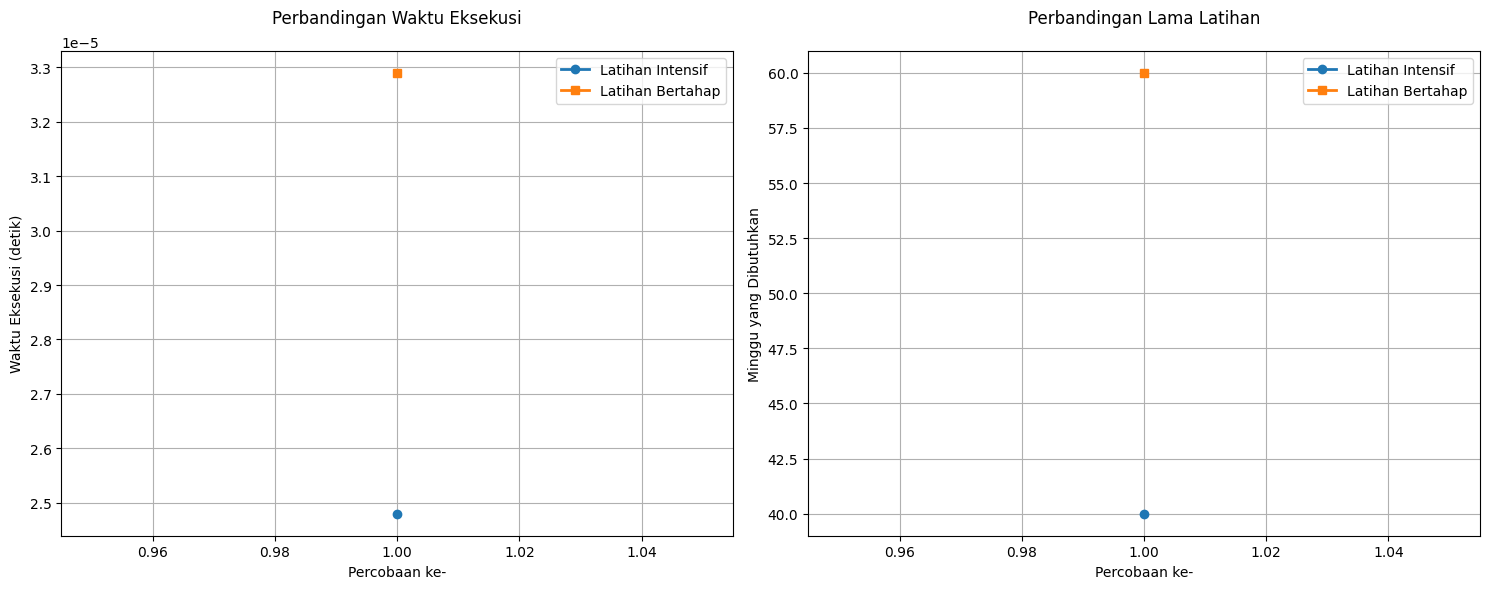

True

In [ ]:
# DATA 1
waktu_awal_str = "60:00"
target_str = "40:00"

process_single_input(waktu_awal_str, target_str)


Data ke-2:
Waktu Awal: 55:30
Waktu Target: 35:00
Hasil Latihan Intensif: 41 minggu
Hasil Latihan Bertahap: 62 minggu

Tabel Perbandingan:
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
| No. | Waktu Awal | Waktu Target | Latihan Intensif | Latihan Bertahap | Waktu Rekursif (s) | Waktu Iteratif (s) |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
|  1  |   60:00    |    40:00     |    40 minggu     |    60 minggu     |      0.000025      |      0.000033      |
|  2  |   55:30    |    35:00     |    41 minggu     |    62 minggu     |      0.000028      |      0.000039      |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+


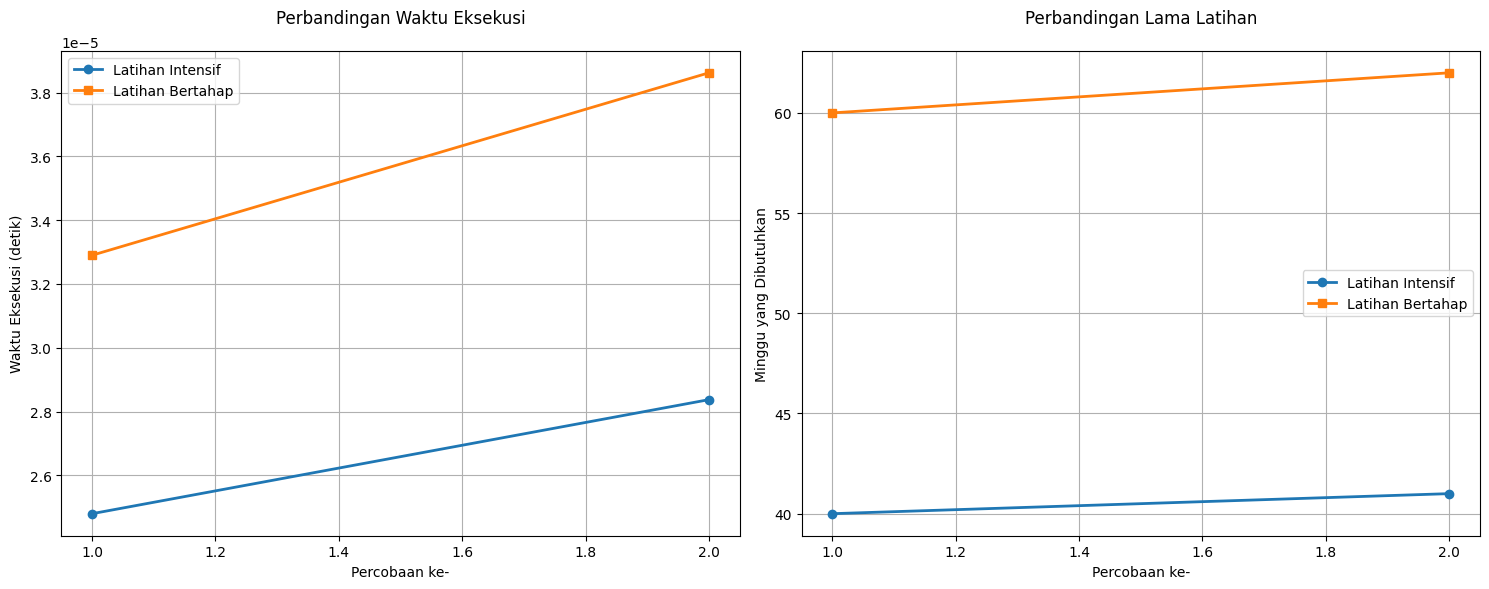

True

In [ ]:
# DATA 2
waktu_awal_str = "55:30"
target_str = "35:00"

process_single_input(waktu_awal_str, target_str)


Data ke-3:
Waktu Awal: 45:00
Waktu Target: 30:00
Hasil Latihan Intensif: 30 minggu
Hasil Latihan Bertahap: 45 minggu

Tabel Perbandingan:
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
| No. | Waktu Awal | Waktu Target | Latihan Intensif | Latihan Bertahap | Waktu Rekursif (s) | Waktu Iteratif (s) |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
|  1  |   60:00    |    40:00     |    40 minggu     |    60 minggu     |      0.000025      |      0.000033      |
|  2  |   55:30    |    35:00     |    41 minggu     |    62 minggu     |      0.000028      |      0.000039      |
|  3  |   45:00    |    30:00     |    30 minggu     |    45 minggu     |      0.000020      |      0.000022      |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+


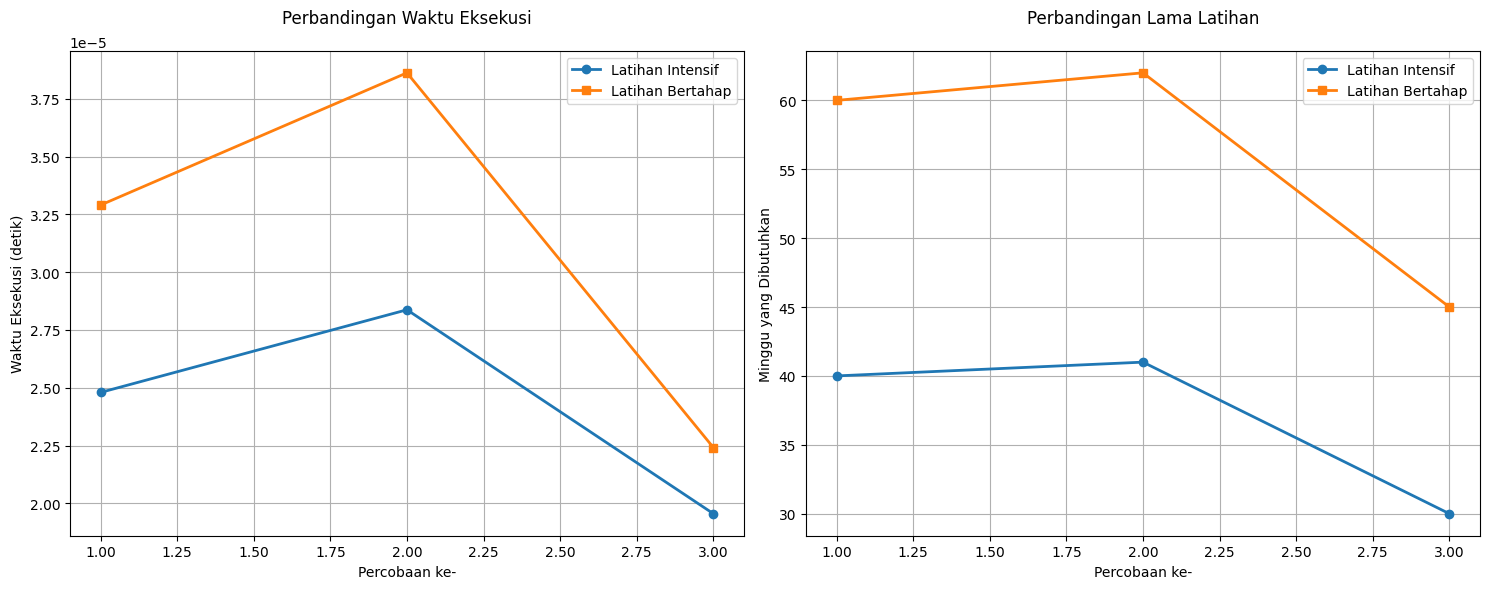

True

In [ ]:
# DATA 3
waktu_awal_str = "45:00"
target_str = "30:00"

process_single_input(waktu_awal_str, target_str)


Data ke-4:
Waktu Awal: 35:30
Waktu Target: 30:00
Hasil Latihan Intensif: 11 minggu
Hasil Latihan Bertahap: 17 minggu

Tabel Perbandingan:
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
| No. | Waktu Awal | Waktu Target | Latihan Intensif | Latihan Bertahap | Waktu Rekursif (s) | Waktu Iteratif (s) |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
|  1  |   60:00    |    40:00     |    40 minggu     |    60 minggu     |      0.000025      |      0.000033      |
|  2  |   55:30    |    35:00     |    41 minggu     |    62 minggu     |      0.000028      |      0.000039      |
|  3  |   45:00    |    30:00     |    30 minggu     |    45 minggu     |      0.000020      |      0.000022      |
|  4  |   35:30    |    30:00     |    11 minggu     |    17 minggu     |      0.000010      |      0.000013      |
+-----+------------+--------------+--------------

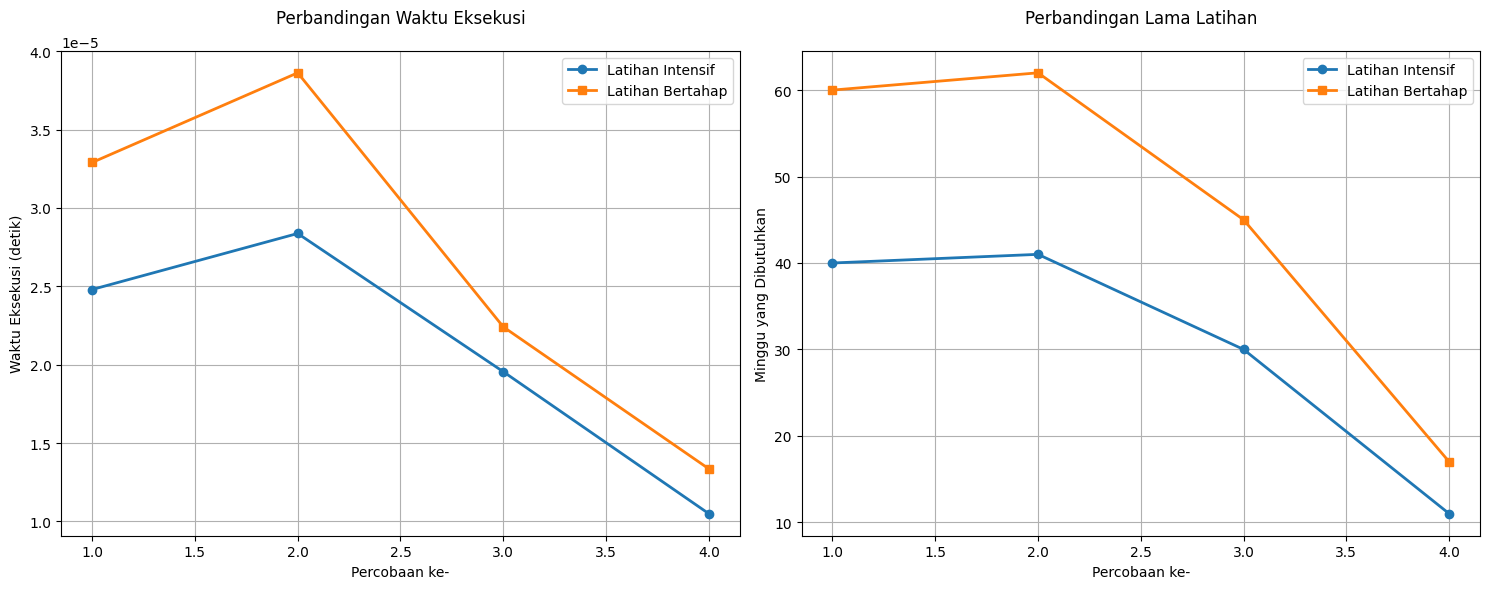

True

In [ ]:
# DATA 4
waktu_awal_str = "35:30"
target_str = "30:00"

process_single_input(waktu_awal_str, target_str)


Data ke-5:
Waktu Awal: 60:00
Waktu Target: 20:00
Hasil Latihan Intensif: 80 minggu
Hasil Latihan Bertahap: 120 minggu

Tabel Perbandingan:
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
| No. | Waktu Awal | Waktu Target | Latihan Intensif | Latihan Bertahap | Waktu Rekursif (s) | Waktu Iteratif (s) |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
|  1  |   60:00    |    40:00     |    40 minggu     |    60 minggu     |      0.000025      |      0.000033      |
|  2  |   55:30    |    35:00     |    41 minggu     |    62 minggu     |      0.000028      |      0.000039      |
|  3  |   45:00    |    30:00     |    30 minggu     |    45 minggu     |      0.000020      |      0.000022      |
|  4  |   35:30    |    30:00     |    11 minggu     |    17 minggu     |      0.000010      |      0.000013      |
|  5  |   60:00    |    20:00     |    80 minggu

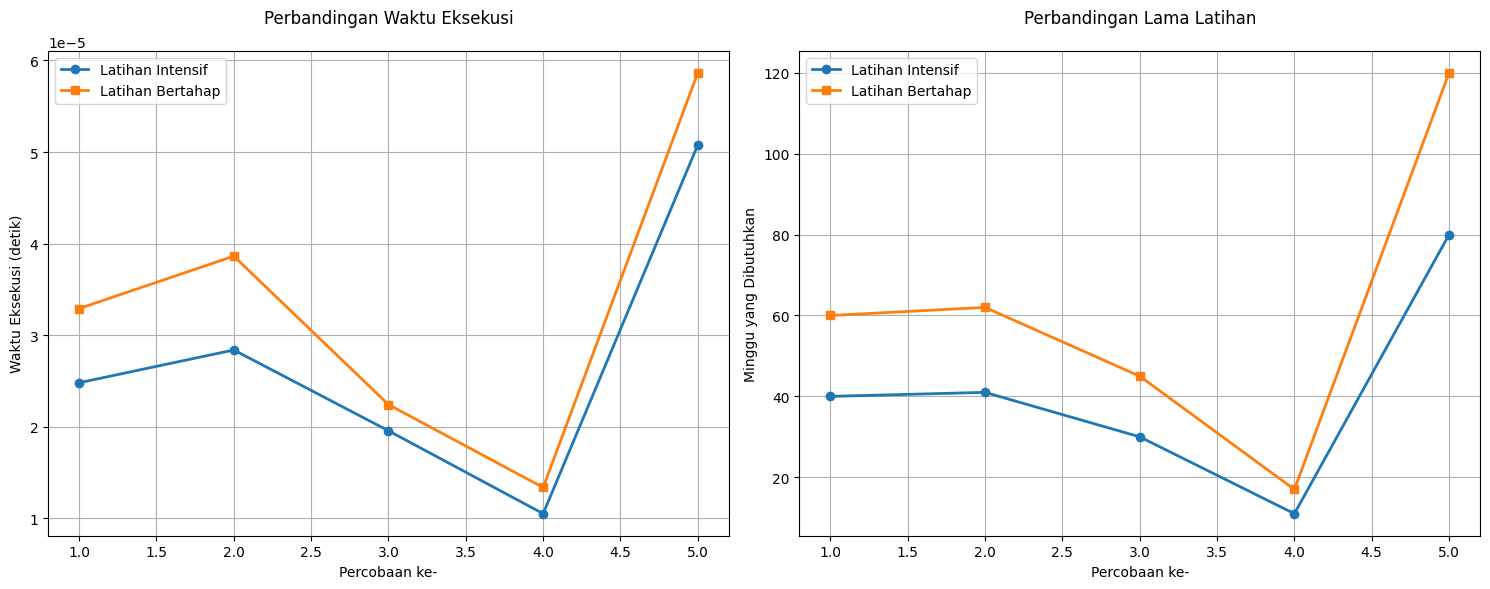

True

In [ ]:
# DATA 5
waktu_awal_str = "60:00"
target_str = "20:00"

process_single_input(waktu_awal_str, target_str)


Data ke-6:
Waktu Awal: 60:00
Waktu Target: 30:00
Hasil Latihan Intensif: 60 minggu
Hasil Latihan Bertahap: 90 minggu

Tabel Perbandingan:
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
| No. | Waktu Awal | Waktu Target | Latihan Intensif | Latihan Bertahap | Waktu Rekursif (s) | Waktu Iteratif (s) |
+-----+------------+--------------+------------------+------------------+--------------------+--------------------+
|  1  |   60:00    |    40:00     |    40 minggu     |    60 minggu     |      0.000025      |      0.000033      |
|  2  |   55:30    |    35:00     |    41 minggu     |    62 minggu     |      0.000028      |      0.000039      |
|  3  |   45:00    |    30:00     |    30 minggu     |    45 minggu     |      0.000020      |      0.000022      |
|  4  |   35:30    |    30:00     |    11 minggu     |    17 minggu     |      0.000010      |      0.000013      |
|  5  |   60:00    |    20:00     |    80 minggu 

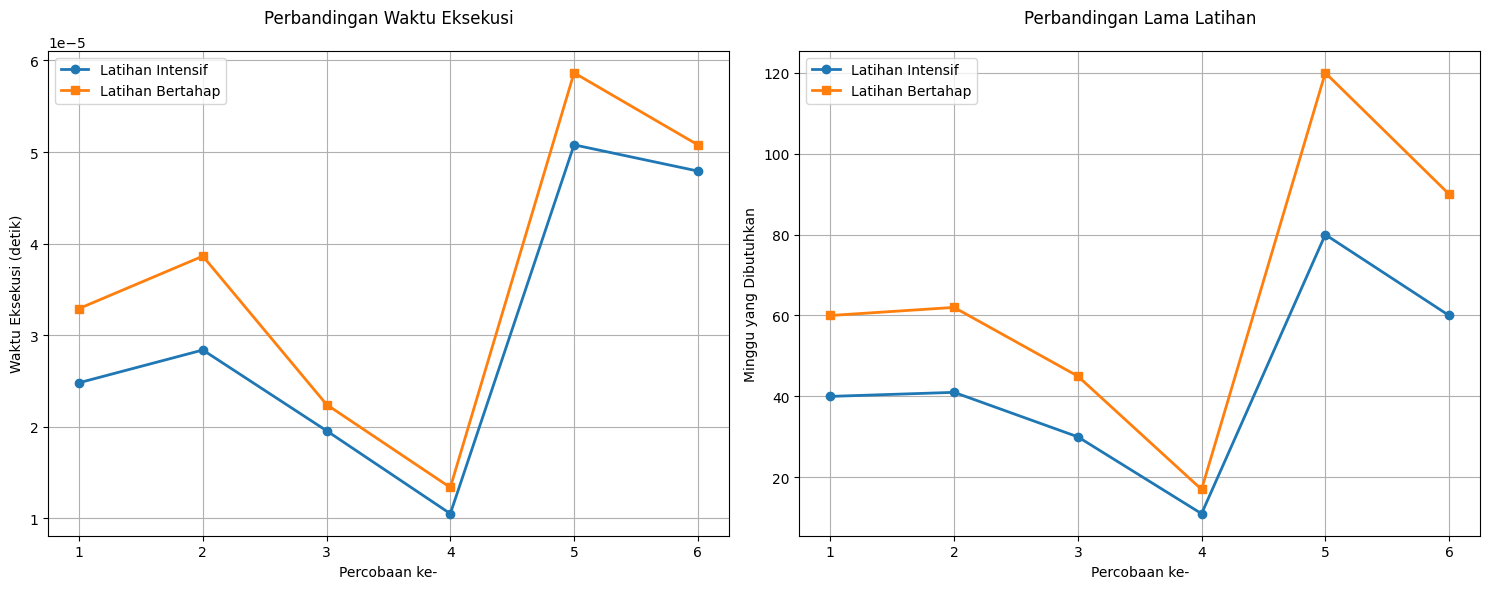

True

In [ ]:
# DATA 6
waktu_awal_str = "60:00"
target_str = "30:00"

process_single_input(waktu_awal_str, target_str)